# Part 2： Logistic Regression with a Neural Network mindset

**原作者：Koala_Tree** [吴恩达Coursera深度学习课程 DeepLearning.ai 编程作业（1-2）](http://blog.csdn.net/koala_tree/article/details/78057033 )
 
 /* 本人在对原作者文章进行学习，文章中的部分中文解释，只是在重难点部分加深印象，稍微解释。*/

### You will learn to: 

- Build the general architecture of a learning algorithm, including: 建立学习算法的总体架构
    - Initializing parameters 初始化参数，数据
    - Calculating the cost function and its gradient  计算代价函数，还有它的 梯度\导数
    - Using an optimization algorithm (gradient descent)  使用最优化算法，梯度下降
    - Gather all three functions above into a main model function, in the right order. 将上面三个函数，使用正确的顺序整合到一个主函数中。

## 1 - Packages

First, let’s run the cell below to import all the packages that you will need during this assignment. 

- [numpy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. numpy 是用来科学计算基本的库
- [h5py](http://www.h5py.org/) is a common package to interact with a dataset that is stored on an H5 file. 
- [matplotlib](https://matplotlib.org/) is a famous library to plot graphs in Python. 绘画
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end. 最后的时候用自己的图片来测试模型。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

% matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement:** You are given a dataset (“data.h5”) containing: 
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0) 一个训练集，有 m 个训练数据，并有标签 cat or  non-cat
- a test set of m_test images labeled as cat or non-cat  一个测试集，images 对应的标签分类 cat or  non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.
你将创建一个简单的图像识别算法，可以正确分类图片 是猫或非猫

Let’s get more familiar with the dataset. Load the data by running the following code.

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    print("train_dataset:",np.shape(train_dataset))
    # train_dataset: (3,)
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features 训练集
   
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels 训练集对应的 标签集
   
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes 测试集中 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print("train_set_x_orig:",np.shape(train_set_x_orig))
print("train_set_y:",np.shape(train_set_y))
# print("train_set_x_orig:\n",train_set_x_orig,"\ntrain_set_y:\n",train_set_y)
print("classes:\n",classes)

train_dataset: (3,)
train_set_x_orig: (209, 64, 64, 3)
train_set_y: (1, 209)
classes:
 [b'non-cat' b'cat']


We added “_orig” at the end of image datasets (train and test) because we are going to preprocess 预处理 them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don’t need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image.是一个数组，代表图像 You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

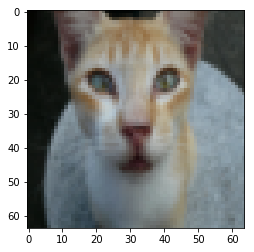

train_set_y[:, index]: [1]
np.squeeze(1): 1
classes[1]: b'cat'
y = [1], it's a 'cat' picture.


In [6]:
# Example of a picture
import matplotlib.pyplot as plt
import pylab 
index = 11
# plt.imshow 绘制
plt.imshow(train_set_x_orig[index])
# 加上这句话 才显示图片
pylab.show()
# index 为 25 的训练数据，是否是 cat ,在 标签集中 str(train_set_y[:, index]) load_dataset() 方法中，已经使用reshape()将 y，label 标签集 转化为
# （1，m）行向量，classes  中 存储的是易于理解的 文字显示 [b'non-cat' b'cat'] ，0 代表 non-cat  ，1 代表 cat

print("train_set_y[:, index]:",train_set_y[:, index])
# train_set_y[:, index]: [1] 
print("np.squeeze(1):",np.squeeze(1))
# np.squeeze(1): 1
print("classes[1]:",classes[1])
# classes[1]: b'cat'
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [7]:
import numpy as np

x = np.array([[[0], [1], [2]]])  

print("x.shape :",x.shape)
# x.shape : (1, 3, 1) 1个 数组 里面有 三行 一列的 数组 

print("np.squeeze(x).shape :",np.squeeze(x).shape)
# np.squeeze(x).shape : (3,) 

x.shape : (1, 3, 1)
np.squeeze(x).shape : (3,)


Many software bugs in deep learning come from having matrix/vector dimensions that don’t fit.(在 DL 中很多 bug 都是因为矩阵或向量的维度不匹配， ) If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.（如果你能保证你的矩阵或向量的维度是正确的，就可以避免或消除很多BUG）

**Exercise:** Find the values for: 
    - m_train (number of training examples) 
    - m_test (number of test examples) 
    - num_px (= height = width of a training image) 
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [8]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0] # 训练集 中的 数据 是从 原始数据中 .shape[0] 获取的，个数 行数 209
m_test = test_set_x_orig.shape[0] # 50 个
num_px = train_set_x_orig.shape[1] # 训练集 中的 数据 是从 原始数据中 .shape[1] 获取的 64* 64 像素
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train)) #训练样本个数
print ("Number of testing examples: m_test = " + str(m_test)) #测试样本个数 
print ("Height/Width of each image: num_px = " + str(num_px)) # 图片高宽像素
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)") # (64, 64, 3) 每一个图片都是 64*64 像素 3 代表 RGB
print ("train_set_x shape: " + str(train_set_x_orig.shape)) #(209, 64, 64, 3) 一共 209 个样本，每个样本 都是 64*64 像素 3 代表 RGB
print ("train_set_y shape: " + str(train_set_y.shape)) # train_set_y shape: (1, 209) 训练集对应标签
print ("test_set_x shape: " + str(test_set_x_orig.shape)) # (50, 64, 64, 3)
print ("test_set_y shape: " + str(test_set_y.shape)) # (1, 50) 

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px ∗ num_px ∗ 3, 1). （为了方便，你应该将 图片 的形状 (num_px, num_px, 3) 转化为一个 形状为 shape (num_px ∗ num_px ∗ 3, 1) 的numpy 数组 ，）After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px ∗ num_px ∗ 3, 1).将 training and  test data 转化为 列向量

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b∗c∗d, a) is to use:
一个技巧，当你想把形状为(a,b,c,d) 准话为 X_flatten X 为基准的 平面 矩阵，使用  (b∗c∗d, a) 

In [37]:
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

In [9]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
# reshape(m_train, -1) m_train 行，列数无限制 ，-1 代表不指定大小 
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape)) # (12288, 209) 
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))# (12288, 50)
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0])) # [17 31 56 22 33] 第 0 列， 0 到 5 不包含5

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


To represent color images,为了代表图像的颜色 the red, green and blue channels (RGB) must be specified for each pixel,指明每一个像素 and so the pixel value is actually a vector of three numbers ranging from 0 to 255. 所以像素实际上是 三个 0 to 255 的数字

One common preprocessing step in machine learning is to center and standardize your dataset, （在ML 中常用的一种预处理过程，就是标准化数据集）meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. （求平均值，然后除以标准差）But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).对于图片数据集来说，更简单方便和有效的是每行除以255

Let’s standardize our dataset. 标准化数据集

In [10]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
print("train_set_x:",train_set_x)
print("test_set_x:",test_set_x)

train_set_x: [[ 0.06666667  0.76862745  0.32156863 ...,  0.56078431  0.08627451
   0.03137255]
 [ 0.12156863  0.75294118  0.27843137 ...,  0.60784314  0.09411765
   0.10980392]
 [ 0.21960784  0.74509804  0.26666667 ...,  0.64705882  0.09019608
   0.20784314]
 ..., 
 [ 0.          0.32156863  0.54117647 ...,  0.33333333  0.01568627  0.        ]
 [ 0.          0.31372549  0.55294118 ...,  0.41960784  0.01960784  0.        ]
 [ 0.          0.31764706  0.55686275 ...,  0.58431373  0.          0.        ]]
test_set_x: [[ 0.61960784  0.45098039  1.         ...,  0.16078431  0.07058824
   0.52156863]
 [ 0.40784314  0.43137255  0.99215686 ...,  0.18431373  0.07058824
   0.63921569]
 [ 0.3254902   0.43529412  0.99607843 ...,  0.32941176  0.0627451
   0.29411765]
 ..., 
 [ 0.67843137  0.67058824  0.52156863 ...,  0.71764706  0.56470588
   0.01960784]
 [ 0.50196078  0.69019608  0.39607843 ...,  0.55294118  0.5372549
   0.08627451]
 [ 0.43137255  0.72941176  0.4745098  ...,  0.45490196  0.42352941

### What you need to remember:

Common steps for pre-processing a new dataset are: 对一个新数据集进行预处理的常见步骤如下：
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, …) 想出计算出问题的规模维度形状
- Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1) 最数据集矩阵形变，矩阵变维
- “Standardize” the data ，标准化数据集

# 3 - General Architecture of the learning algorithm 算法的一般体系结构

It’s time to design a simple algorithm to distinguish cat images from non-cat images.
是时候去设计一个简单算法去区分一张图片 is cat or non-cat
You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains **why Logistic Regression is actually a very simple Neural Network!**
你将用一个神经网络去构建一个Logistic Regression,下面将会解释，为什么 Logistic Regression 就是一个简单的神经网络。

<img src="https://raw.githubusercontent.com/laobadao/Deep-Learning/master/homework/Jupyter/jupyter_note/pic/cat.png">

**Mathematical expression of the algorithm:**

For one example $x^{(i)}$:

$z^{(i)} = w^T x^{(i)} + b \tag{1}$

$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$

$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$

The cost is then computed by summing over all training examples: 

$J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$

**Key steps: 
In this exercise, you will carry out the following steps: ** 关键步骤，执行如下步骤
 
- Initialize the parameters of the model 初始化模型的参数
- Learn the parameters for the model by minimizing the cost 通过为模型最小化损失 学习参数
- Use the learned parameters to make predictions (on the test set) 使用这个学习参数，相当于权重，去做预测，在测试集上
- Analyse the results and conclude 分析结果并做分析

# 4 - Building the parts of our algorithm  构建算法的各个部分

The main steps for building a Neural Network are: 构建神经网络的主要步骤如下
1. Define the model structure (such as number of input features)  定义模型结构 例如输入的特征
2. Initialize the model’s parameters 初始化参数
3. Loop: 循环计算
    - Calculate current loss (forward propagation) 计算当前损失  正向传播
    - Calculate current gradient (backward propagation) 计算当前梯度（导数），反向传播
    - Update parameters (gradient descent) 更新参数，梯度下降

You often build 1-3 separately and integrate them into one function we call model().通常将上面三个步骤分别创建，然后再 model() 中结合使用 

## 4.1 - Helper functions 

**Exercise:** Using your code from “Python Basics”, implement `sigmoid()`. As you’ve seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$  to make predictions. Use np.exp().

In [11]:
import numpy as np

# def sigmoid(x):
#     s = 1.0 / (1 + 1/ np.exp(x))
#     return s

# print(sigmoid(0))


# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z
    注释要写详细，这是个好习惯
    Arguments:
    z -- A scalar or numpy array of any size. 输入参数可以是一个标量或者是 任意大小的 numpy 数组

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0/(1+np.exp(-z))
    ### END CODE HERE ###

    return s

print(sigmoid(0))  
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

0.5
sigmoid([0, 2]) = [ 0.5         0.88079708]


## 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize `w `as a vector of zeros. 初始化 w 为一个 0 矩阵，If you don’t know what numpy function to use, look up `np.zeros() `in the Numpy library’s documentation.

In [12]:
# def initialize_w(size):
#     w = np.zeros((size,1))
#     return w
# print(initialize_w(5))

# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###
    
    # Andrew Ng 经常说的，为了避免 bug 可以使用 assert 语句去检查其形状大小是否正确    
    assert(w.shape == (dim, 1))
    #  是否是 float 或 int  类型实例    
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

w ,b = initialize_with_zeros(10)
print("w:",str(w),"b:",str(b))

w: [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] b: 0


For image inputs, w will be of shape (num_px × num_px × 3, 1). 对于图像输入来说 W 的 shape 应该是 （num_px * num_px * 3,1）

## 4.3 - Forward and Backward propagation 正向传播和反向传播

Now that your parameters are initialized, you can do the “forward” and “backward” propagation steps for learning the parameters.
现在你已经将参数初始化完成， 可以进行 正向和反向传播的步骤 去进行 “学习参数”

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient. 实现 传播 函数，并计算它的代价\成本函数和它的梯度(包括 dw,db)。

**Hints:**

Forward Propagation: 
- You get X 获取 X 矩阵 数据集 
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function:$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using:

$\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$

$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$

In [13]:
# def propagate(w,b,X,Y):
#     """
#     X matrix (n,m) m 列数
#     """
#     # 矩阵 内积 np.dot
#     A = sigmoid(np.dot(w.T,X)+ b) 
#     # !!!计算 m, X 矩阵的列数   
#     m = X.shape[1] 
#     # 1 通常用 float 类型 都写成 1.0    
#     cost = (-1.0/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
#     # 矩阵相乘 np.dot 内积 矩阵 内积     
#     dw = (1.0/m) * np.dot(X,(A-Y).T)
    
#     db = (1.0/m) * np.sum(A-Y)
    
#     grads = {"dw": dw,
#              "db": db}
    
#     return cost,grads

# w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
                   
# cost,grads = propagate(w, b, X, Y)
                   
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))
# print ("cost = " + str(cost))

# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    实现 代价函数 和 梯度
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1) 权重
    b -- bias, a scalar 偏差 标量
    X -- data of size (num_px * num_px * 3, number of examples) 数据集
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples) 标签集

    Return:
    cost -- negative log-likelihood cost for logistic regression 负的 对数似然函数
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot() 使用 np.log(), np.dot() np.sum()
    """

    m = X.shape[1] # m 列 m 个训练样本

    # FORWARD PROPAGATION (FROM X TO COST) 正向传播
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X)+b)                                    # compute activation 计算激活函数
    cost = -(1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 # compute cost 计算代价函数
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD) 反向传播
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1.0/m)*np.dot(X,(A-Y).T)
    db = (1.0/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}

    return grads, cost
    

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))
# print ("cost = " + str(cost))

## d) Optimization 最优化

You have initialized your parameters.

You are also able to compute a cost function and its gradient.
Now, you want to update the parameters using gradient descent.
使用梯度下降 更新参数

**Exercise:** Write down the optimization function. The goal is to learn w and b by minimizing the cost function $ J $. For a parameter $\theta $, the update rule is $\theta = \theta - \alpha \text{ } d\theta$ , where $\alpha$ is the learning rate. 学习率
最优化函数 ，目标是 通过最小化代价函数 去学习更新 w 和 b,

In [21]:
# def optimize(w,b,X,Y,max_iter,learning_rate,print_cost = False):
#     一般初始化的变量放在最开头
#     costs = [] 
#     grads, cost = propagate(w, b, X, Y)
#     for i in range(max_iter):
        
#         dw = grads["dw"]
#         db = grads["db"]
#         w -= learning_rate * dw
#         b -= learning_rate * db
#         if i % 100 ==0:
#                 costs.append(cost)
#         if print_cost and i % 100 == 0:
#             print ("Cost after iteration %i: %f" %(i, cost))
            
#     params = {"w": w,
#               "b": b}

#     grads = {"dw": dw,
#              "db": db}

#     return params, grads, costs

# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop 最大迭代次数
    learning_rate -- learning rate of the gradient descent update rule 梯度下降的 更新规则 学习速率
    print_cost -- True to print the loss every 100 steps 每迭代 100 次 打印 loss 损失

    Returns:
    params -- dictionary containing the weights w and bias b 字典 包含权重和 偏差
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them: 基本写2步就可以进行迭代
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###

        # Record the costs 记录 cost 代价 成本
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.08608643]
 [ 0.10971233]]
b = -0.14427426648
dw = [[ 0.12311093]
 [ 0.13629247]]
db = -0.149239158846


**Exercise:** The previous function will output the learned w and b. (之前的函数将会输出 学习后的参数 w and b )We are able to use w and b to predict the labels for a dataset X. (用 w and b 去预测一个 数据集 X 的 label)Implement the `predict()` function. There is two steps to computing predictions:实现预测函数，用两步去实现

Calculate $\hat{Y} = A = \sigma(w^T X + b)$ 

Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5),根据激活函数值是 大于还是小于 0.5 ,去判断 a 属于 0 还是1   stores the predictions in a vector `Y_prediction`.存储预测值到一个向量中 If you wish, you can use an `if/else` statement in a `for` loop (though there is also a way to vectorize this).

**注意：（n,m） n 是 n 行，代表 X 有 n 个特性，m 是 m  列 代表有 m 个训练样本**

In [22]:
"""def predict(w,b,X):
    # Error: 错误记录
    # 1.没有初始化  Y_prediction 作为一个向量，题目要求中已经明确指出来了，要初始化为一个向量，存储所有的 转化后的 y 值,
    # 2.X 是一个数据集，就是 要对 所有的 X 中的数据集做预测，则会有 对应的 行数的 Y 向量 在存储
    # 3.A 是做完预测后 返回的 激活函数的 一个向量集合 是一个 [0,1]  区间的概率，要根据 每个元素概率大小再去 转化为 0 或 1，且存到 向量中 
    # 变量名经常写错，要经常用 np.zeros() and np.reshape()       
    Y_prediction =np.zeros((1,X.shape[1]))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    print("A:",A)
    print("A.shape:",A.shape)
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    assert(Y.shape ==(1,X.shape[1]))
    return Y_prediction

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))"""

# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    使用 学习后的 逻辑回归参数 w,b 去预测 标签是 0 还是1
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X,一个 数组向量 包含所有的对于 X 的预测值
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
#     print("w.shape:",w.shape)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
#     print("A:",A)
#     print("A.shape:",A.shape)
# A: [[ 0.52241976  0.50960677  0.34597965]]
# A.shape: (1, 3)
    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] > 0.5:
            Y_prediction[0,i] = int(1)
        else:
            Y_prediction[0,i] = int(0)
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
# print("X.shape:",X.shape)
# X.shape: (2, 3)
# 注意：（n,m） n 是 n 行，代表 X 有 n 个特性，m 是 m  列 代表有 m 个训练样本
print ("predictions = " + str(predict(w, b, X)))
    

predictions = [[ 1.  1.  0.]]


**What to remember: **

**You’ve implemented several functions that: 
- Initialize (w,b)  初始化参数 w and b
- Optimize the loss iteratively to learn parameters (w,b):  最优化损失 迭代的去学习 参数 w and b 
- computing the cost and its gradient  计算 成本函数 和它的 梯度
- updating the parameters using gradient descent 使用 梯度下降更新参数
- Use the learned (w,b) to predict the labels for a given set of examples 使用学习后的 最佳拟合参数 w and b 去对给出的数据集做预测** 

## 5 - Merge all functions into a model 将所有函数合并到一个 model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation: 
- Y_prediction for your predictions on the test set 
- Y_prediction_train for your predictions on the train set 
- w, costs, grads for the outputs of optimize()

In [23]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train) 训练集数据
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train) 训练集标签
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test) 测试集数据
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test) 测试集标签
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters 最大迭代次数
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize() 学习速率
    print_cost -- Set to true to print the cost every 100 iterations 每100次 打印一下 cost 

    Returns:
    d -- dictionary containing information about the model. 返回一个字典 包含 model 的相关信息
    """

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code) 初始化 w,b X_train.shape[0] 是 行数，每个 x 的 n 个特征，每个特征对应要有 一个w 权重 拟合参数
    # w ,b 其实就是 对x 的 每一个 特征 x_1_(1)  x1 样本的 第一个特征,进行拟合 给出 w 和 偏移 b 所以是跟 x 的行数 也就是 x 有多少个 特征有关
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code) w and b 的梯度 dw and db ,以及 代价成本
    # 最优化后的 最佳拟合参数 w and b     
    #       params = {"w": w,
    #               "b": b}

    #     grads = {"dw": dw,
    #              "db": db}
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors 打印 训练集 和 测试集中 错误率
    #  Y_prediction_train - Y_train 相同则 相减为 0 ,b不同 则相减 为 |1| np.abs（） 取绝对值 为错误个数 100 - errors 为正确率
    # np.mean 求平均值     
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model. 训练模型

In [38]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
print(d)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
{'costs': [0.69314718055994529, 0.58450836369930859, 0.46694904094655459, 0.37600686694802077, 0.33146328932825114, 0.30327306747438287, 0.27987958658260481, 0.26004213692587569, 0.24294068467796615, 0.22800422256726072, 0.21481951378

num_iterations = 2000
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %

num_iterations = 3000
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

将迭代次数 从 2000 增加到3000 ，对于训练集准确率 增大，但是对于 测试集 准确率降低，这是出现了过拟合现象。

从上面的 cost 成本代价值观察可得：训练的数据越多，其 w and b 参数拟合行越好，损失降低，最后正确率相对还可以不过测试集中正确率较低。

**Comment:** Training accuracy is close to 100%. This is a good sanity check 安全性检查: your model is working and has high enough capacity to fit the training data. 模型是有效的Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 线性分类 But no worries, you’ll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data.对训练数据过拟合 Later in this specialization you will learn how to reduce overfitting, 降低过拟合for example by using regularization.正则化 Using the code below (and changing the index variable) you can look at predictions on pictures of the test set.

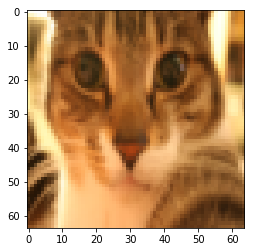

test_set_y: [[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
  1 0 0 1 1 1 0 0 0 1 1 1 0]]
classes: [b'non-cat' b'cat']
y = 1, you predicted that it is a "cat" picture.


In [25]:
# Example of a picture that was wrongly classified.

import matplotlib.pyplot as plt
import pylab

index = 3
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
# 加上这句话 才显示图片
pylab.show()
print("test_set_y:",test_set_y)
print("classes:",classes)
# d 上面返回值 d 字典中的 Y_prediction_test 向量里存储的值 是 float 类型的，所以 classes 里面取值 index 会出现错误 用 int () 转换 
# 注意 float 类型和 int 类型之间的转换
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")


Let’s also plot the cost function and the gradients.

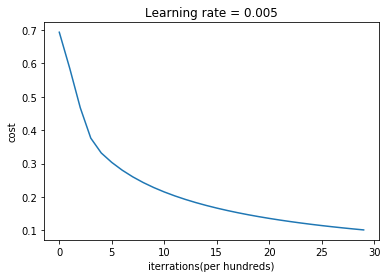

In [28]:
# Plot learning curve (with costs) 绘画学习曲线
# costs list 类型存储 每100 次迭代后的 成本值
# costs = np.squeeze(d['costs'])
# plt.plot(costs)
# plt.ylabel('cost')# y 轴
# plt.xlabel('iterations (per hundreds)') 
# plt.title("Learning rate =" + str(d["learning_rate"]))
# plt.show()


costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterrations(per hundreds)')
plt.title('Learning rate = '+str(d["learning_rate"]))
plt.show()

**Interpretation:** 解释说明 

You can see the cost decreasing.可以看出来 cost 是在下降的 It shows that the parameters are being learned. 展现出了参数是被学习了的 However, you see that you could train the model even more on the training set.你可以在更多的数据上去训练模型 Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.增加迭代次数 可以发现对于训练集 准确率是上升的，但是对于测试集准确率是下降的。

## 6 - Further analysis (optional/ungraded exercise)

Congratulations on building your first image classification model. Let’s analyze it further, and examine possible choices for the learning rate $\alpha$.检查对学习速率 可能的选择

### Choice of learning rate 选择学习速率

**Reminder:** 

In order for Gradient Descent to work you must choose the learning rate wisely.为了梯度下降有效，需要聪明的去选择学习速率 The learning rate $\alpha$ determines how rapidly we update the parameters.学习速率代表了更新参数的速度如何 If the learning rate is too large we may “overshoot” the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. 太大会超过最佳值，太小需要迭代更多的次数去收敛到最佳值 That’s why it is crucial to use a well-tuned learning rate.所以用一个调整好了的学习速率非常重要

Let’s compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



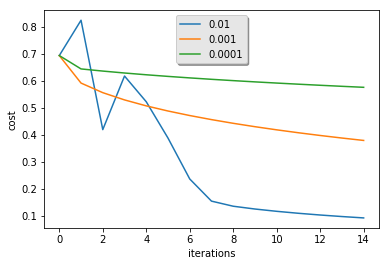

In [29]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
# 循环训练三种不同学习速率 models 字典存储不同的 三次训练结果
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
# 绘画出三条学习曲线 models 中循环取出数据 绘画
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

# 绘制图例
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation:**解释说明

- Different learning rates give different costs and thus different predictions results. 不同的学习速率 不同的代价成本 不同的预测值

- If the learning rate is too large (0.01), the cost may oscillate up and down. （预测值太大，代价可能会上下波动）It may even diverge 可能会发散(though in this example, using 0.01 still eventually ends up at a good value for the cost). 

- A lower cost doesn’t mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy. 较低的代价，不意味着是个更好的模型，需要检查是否出现过拟合，它常发生在 训练准确度 高于 测试准确度。

- In deep learning, we usually recommend that you:  在 DL 中推荐你这样做
    - Choose the learning rate that better minimizes the cost function. 选择一个能最小化代价成本的 学习速率
    - If your model overfits, use other techniques to reduce overfitting. (We’ll talk about this in later videos.) 如果模型过拟合，选择其他的技巧去降低拟合

## 7 - Test with your own image (optional/ungraded exercise)

Congratulations on finishing this assignment.完成作业 You can use your own image and see the output of your model. To do that: 

1. Click on “File” in the upper bar of this notebook, then click “Open” to go on your Coursera Hub. 
2. Add your image to this Jupyter Notebook’s directory, in the “images” folder 
3. Change your image’s name in the following code 
4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

num_px: 64


d:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
d:\program files\python36\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


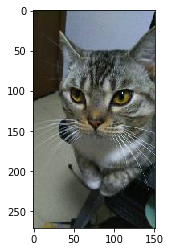

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


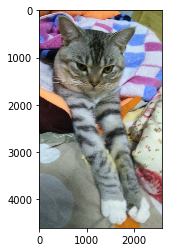

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


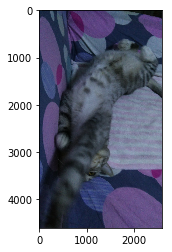

y = 0.0, your algorithm predicts a "non-cat" picture.
num_px: 64


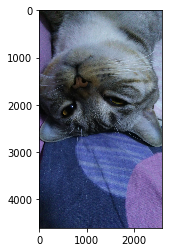

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


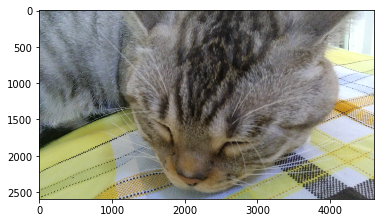

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


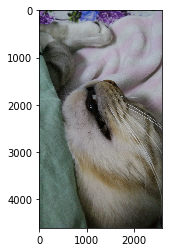

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


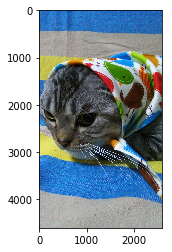

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


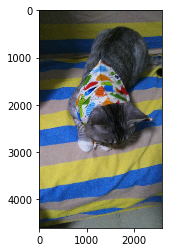

y = 1.0, your algorithm predicts a "cat" picture.
num_px: 64


d:\program files\python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


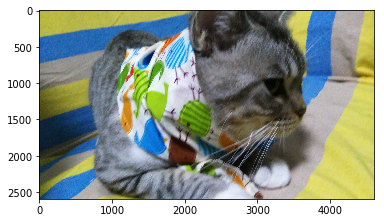

y = 0.0, your algorithm predicts a "non-cat" picture.
num_px: 64


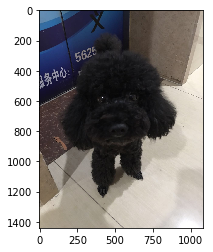

y = 1.0, your algorithm predicts a "cat" picture.


In [39]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
# 这个是从本地 lr_utils.py 文件中 导入load_dataset 方法
from lr_utils import load_dataset
import pylab
import scipy.ndimage as spnd

# my_image = "four.jpg"   # change this to the name of your image file 
# ## END CODE HERE ##

# # We preprocess the image to fit your algorithm.
# fname = "images/" + my_image
# image = np.array(spnd.imread(fname, flatten=False))
# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
# my_predicted_image = predict(d["w"], d["b"], my_image)

# plt.imshow(image)
# pylab.show()
# print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


images_pics =["four.jpg","four1.jpg","four2.jpg","four3.jpg","four4.jpg","four5.jpg","four6.jpg","four7.jpg","four8.jpg","dog.jpg"]

for i in range(len(images_pics)):
    fname = "images/" + images_pics[i]
    #  spnd.imread 图片读取
    image = np.array(spnd.imread(fname, flatten=False))
    #  scipy.misc.imresize 图片大小 resize   
    print("num_px:",num_px)
    my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
    my_predicted_image = predict(d["w"], d["b"], my_image)

    plt.imshow(image)
    pylab.show()
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

    

很明显，算法不够智能，一张 dog 的图片居然预测说是 cat ,其中几张 cat 的图片，居然预测是 non-cat .

问题1：训练 数据集 num_px 是 64*64 ，而后面使用的本地图片 测试集是 2000 多，so 这有一点影响，且训练数据集中的 图片 不够全面

## **What to remember from this assignment: ** 重点，这项作业中应该记住的

### 1. Preprocessing the dataset is important.  
数据预处理很重要

### 2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model(). 
分别实现每一个功能函数，初始化 正向反向传播 最优化 然后再构建到一个 model() 中

### 3. Tuning the learning rate (which is an example of a “hyperparameter”) can make a big difference to the algorithm. You will see more examples of this later in this course!   
调参 学习速率 ，对于算法会有很大不同 
